In [ ]:
# y = m1x1 + m2x2 + ... + mnxn + b
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

print("Vista del Dataset")
print(df.head())

print("Informacion general del DataFrame")
print(df.info())


Vista del Dataset
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Informacion general del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [ ]:
#Ver los nombres exactos de las columnas
print("\nNombres de las columnas:")
print(df.columns.tolist())


Nombres de las columnas:
['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']


In [14]:
# Verificacion y limpieza de datos null
print("Conteo d valores nulos")
print(df.isnull().sum())


Conteo d valores nulos
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


In [17]:
# Division del conjunto de datos
if df.columns[0] == 'Unnamed: 0':
    df = df.drop('Unnamed: 0', axis=1)

x = df.drop("sales", axis=1)
y = df["sales"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"\nDatos de entrenamiento {x_train.shape}, Prueba {x_test.shape}")




Datos de entrenamiento (160, 3), Prueba (40, 3)


In [18]:
# Escalamento de caracteristicas
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
# Creacion y entrenamiento del modelo
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Prediccion de datos
y_pred = model.predict(x_test_scaled)

print("Primeras predicciones")
print(y_pred[:10])


Primeras predicciones
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967]


In [45]:
# Evaluacion del modelo
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
exactitud = 100 - mape

print("\nEvaluacion del modelo ")

print(f"\n1. MAE (Error Absoluto Medio): {mae:.3f}")
print(f"   → Las predicciones se desvían en promedio {mae:.2f} unidades")

print(f"\n2. MAPE (Error Porcentual): {mape:.2f}%")
print(f"   → El error promedio es del {mape:.1f}%")

print(f"\n3. Exactitud del Modelo: {exactitud:.2f}%")
print(f"   → El modelo es {exactitud:.1f}% exacto")

print(f"\n4. Error cuadratico medio (MSE) {mse:.3f}")

print(f"\n5. Raiz de error cuadratico medio (RMSE) {rmse:.3f}")
print(f"\n6. Coeficiente de determinacion (R^2) {r2:.3f}")





Evaluacion del modelo 

1. MAE (Error Absoluto Medio): 1.461
   → Las predicciones se desvían en promedio 1.46 unidades

2. MAPE (Error Porcentual): 15.20%
   → El error promedio es del 15.2%

3. Exactitud del Modelo: 84.80%
   → El modelo es 84.8% exacto

4. Error cuadratico medio (MSE) 3.174

5. Raiz de error cuadratico medio (RMSE) 1.782

6. Coeficiente de determinacion (R^2) 0.899


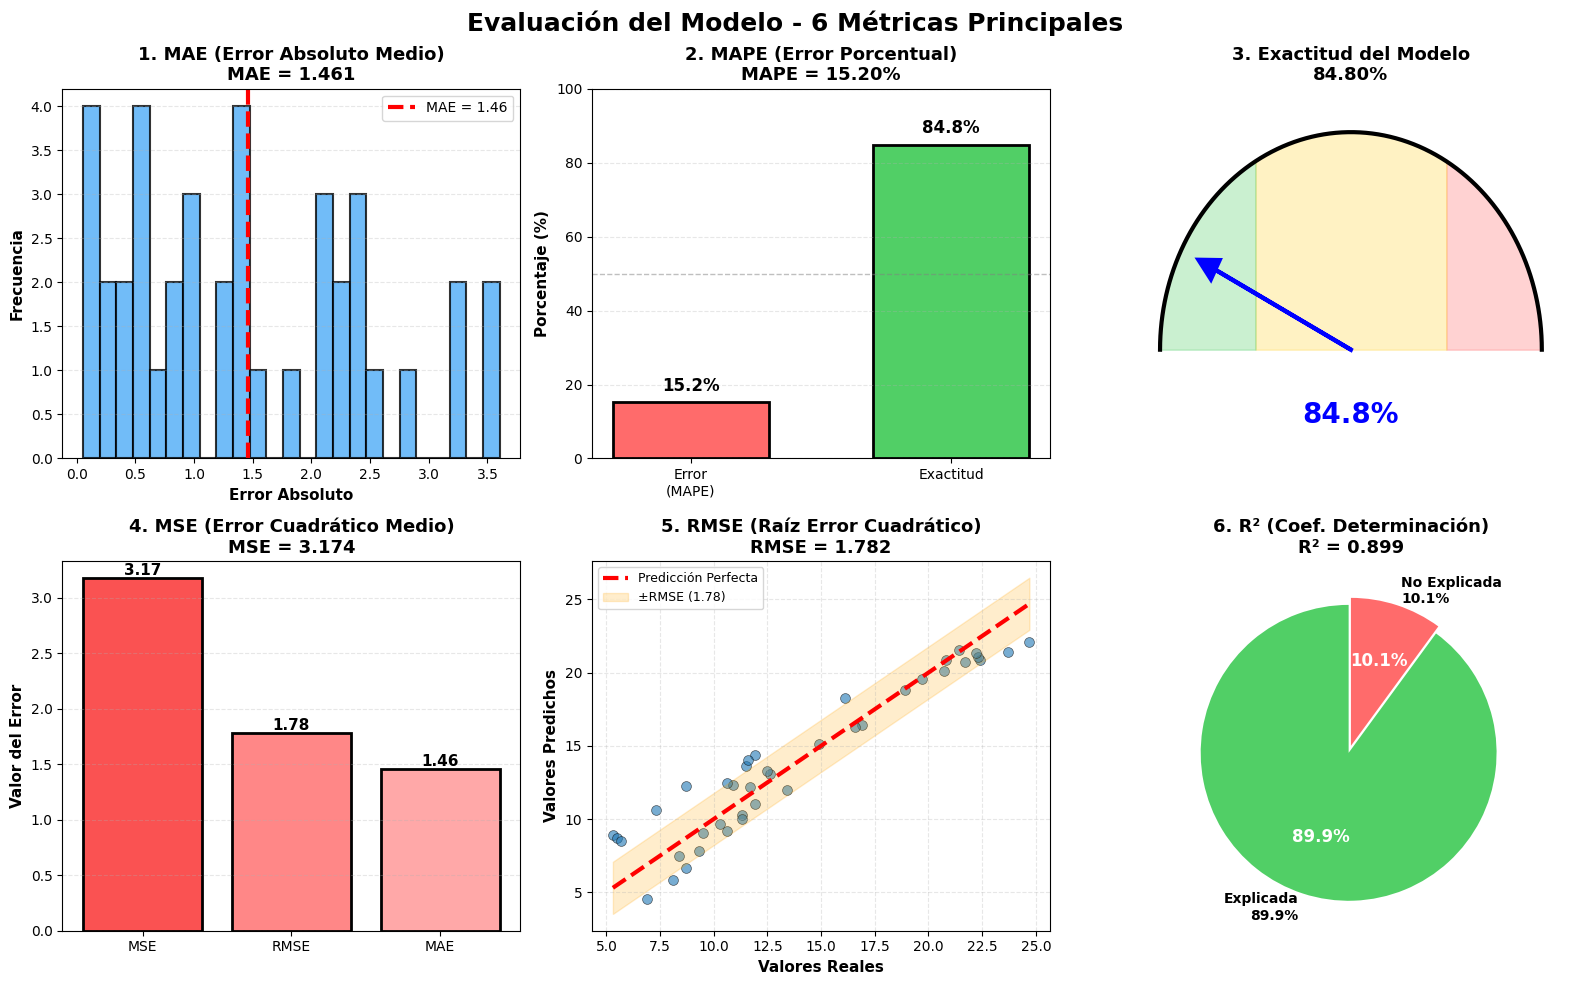

In [ ]:
#Graficas 
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16, 10))
fig.suptitle('Evaluación del Modelo - 6 Métricas Principales', 
             fontsize=18, fontweight='bold', y=0.98)


# GRÁFICA 1: MAE 
ax1 = plt.subplot(2, 3, 1)
error_abs = np.abs(y_test - y_pred)
ax1.hist(error_abs, bins=25, color='#4dabf7', edgecolor='black', 
         linewidth=1.5, alpha=0.8)
ax1.axvline(mae, color='red', linestyle='--', linewidth=3, 
           label=f'MAE = {mae:.2f}')
ax1.set_xlabel('Error Absoluto', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax1.set_title(f'1. MAE (Error Absoluto Medio)\nMAE = {mae:.3f}', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# GRÁFICA 2: MAPE 
ax2 = plt.subplot(2, 3, 2)

categorias = ['Error\n(MAPE)', 'Exactitud']
valores = [mape, exactitud]
colores = ['#ff6b6b', '#51cf66']

barras = ax2.bar(categorias, valores, color=colores, 
                 edgecolor='black', linewidth=2, width=0.6)
ax2.set_ylabel('Porcentaje (%)', fontsize=11, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.set_title(f'2. MAPE (Error Porcentual)\nMAPE = {mape:.2f}%', 
              fontsize=13, fontweight='bold')
ax2.axhline(y=50, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for barra, valor in zip(barras, valores):
    altura = barra.get_height()
    ax2.text(barra.get_x() + barra.get_width()/2., altura + 2,
            f'{valor:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# GRÁFICA 3: Exactitud del Modelo
ax3 = plt.subplot(2, 3, 3)

theta = np.linspace(0, np.pi, 100)
r = 1

ax3.plot(r * np.cos(theta), r * np.sin(theta), 'k-', linewidth=3)

theta_rojo = np.linspace(0, np.pi/3, 50)
theta_amarillo = np.linspace(np.pi/3, 2*np.pi/3, 50)
theta_verde = np.linspace(2*np.pi/3, np.pi, 50)

ax3.fill_between(r * np.cos(theta_rojo), 0, r * np.sin(theta_rojo), 
                 color='#ff6b6b', alpha=0.3)
ax3.fill_between(r * np.cos(theta_amarillo), 0, r * np.sin(theta_amarillo), 
                 color='#ffd43b', alpha=0.3)
ax3.fill_between(r * np.cos(theta_verde), 0, r * np.sin(theta_verde), 
                 color='#51cf66', alpha=0.3)

angulo_exactitud = np.pi * (exactitud / 100)
ax3.arrow(0, 0, 0.8 * np.cos(angulo_exactitud), 0.8 * np.sin(angulo_exactitud),
         head_width=0.1, head_length=0.1, fc='blue', ec='blue', linewidth=3)

ax3.text(0, -0.3, f'{exactitud:.1f}%', ha='center', va='center',
        fontsize=20, fontweight='bold', color='blue')
ax3.set_xlim(-1.2, 1.2)
ax3.set_ylim(-0.5, 1.2)
ax3.axis('off')
ax3.set_title(f'3. Exactitud del Modelo\n{exactitud:.2f}%', 
              fontsize=13, fontweight='bold')

# GRÁFICA 4: MSE 
ax4 = plt.subplot(2, 3, 4)

# Comparar 
metricas_error = ['MSE', 'RMSE', 'MAE']
valores_error = [mse, rmse, mae]
colores_error = ['#fa5252', '#ff8787', '#ffa8a8']

barras_error = ax4.bar(metricas_error, valores_error, color=colores_error,
                       edgecolor='black', linewidth=2)
ax4.set_ylabel('Valor del Error', fontsize=11, fontweight='bold')
ax4.set_title(f'4. MSE (Error Cuadrático Medio)\nMSE = {mse:.3f}', 
              fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3, linestyle='--')

for barra, valor in zip(barras_error, valores_error):
    altura = barra.get_height()
    ax4.text(barra.get_x() + barra.get_width()/2., altura,
            f'{valor:.2f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# GRÁFICA 5: RMSE 
ax5 = plt.subplot(2, 3, 5)
ax5.scatter(y_test, y_pred, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
        'r--', lw=3, label='Predicción Perfecta')

ax5.fill_between([y_test.min(), y_test.max()], 
                 [y_test.min() - rmse, y_test.max() - rmse],
                 [y_test.min() + rmse, y_test.max() + rmse],
                 alpha=0.2, color='orange', label=f'±RMSE ({rmse:.2f})')

ax5.set_xlabel('Valores Reales', fontsize=11, fontweight='bold')
ax5.set_ylabel('Valores Predichos', fontsize=11, fontweight='bold')
ax5.set_title(f'5. RMSE (Raíz Error Cuadrático)\nRMSE = {rmse:.3f}', 
              fontsize=13, fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3, linestyle='--')

# GRÁFICA 6: R²
ax6 = plt.subplot(2, 3, 6)

varianza_explicada = r2 * 100
varianza_no_explicada = (1 - r2) * 100

valores_r2 = [varianza_explicada, varianza_no_explicada]
etiquetas_r2 = [f'Explicada\n{varianza_explicada:.1f}%', 
                f'No Explicada\n{varianza_no_explicada:.1f}%']
colores_r2 = ['#51cf66', '#ff6b6b']

wedges, texts, autotexts = ax6.pie(valores_r2, labels=etiquetas_r2,
                                     colors=colores_r2, autopct='%1.1f%%',
                                     startangle=90, explode=(0.05, 0),
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

ax6.set_title(f'6. R² (Coef. Determinación)\nR² = {r2:.3f}', 
              fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show() 
